# CutSky OutPut

In this notebook, we show the output of `cutsky`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('/pscratch/sd/s/siyizhao/fihobi/lc_test/test_prep_cutsky/cutsky_N_2.8_3.5.dat')
nz_ref = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/PIP/QSO_NGC_nz.txt')
area = 7417.4268 #deg^2, for the file above
area_tiles = 8752.0 # deg^2, provided by Cheng
nz_input = np.loadtxt('/global/homes/s/siyizhao/projects/fihobi/data/nz/QSO_NGC_nz_v2.txt')

In [3]:
ra = data[:,0]
dec = data[:,1]
z_obs = data[:,2]
z_cosmo = data[:,3]
nz = data[:,4]
status = data[:,5]
ran_num = data[:,6]

## random number

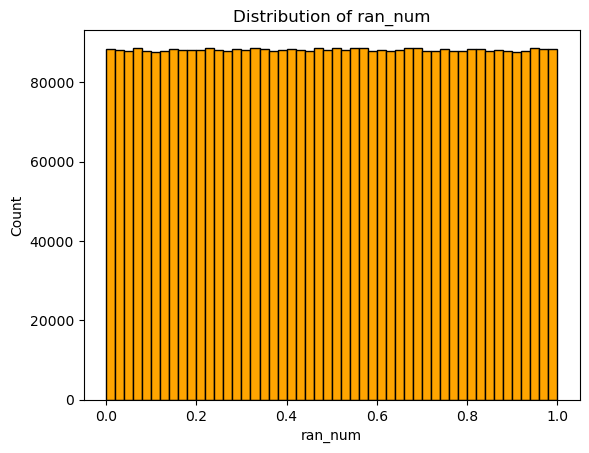

In [4]:
plt.hist(ran_num, bins=50, color='orange', edgecolor='black')
plt.xlabel('ran_num')
plt.ylabel('Count')
plt.title('Distribution of ran_num')
plt.show()

## status

- `STATUS`: *(Optional)* Bitmask for extra selections: `1` = within an extra footprint; `2` = kept in radial selection 

In our case, we do not have extra footprint mask, so the `status` have only 2 cases: `2`=kept in radial selection, `0`=not kept in radial selection.

In [5]:
np.unique(status)

array([0., 2.])

## n(z)

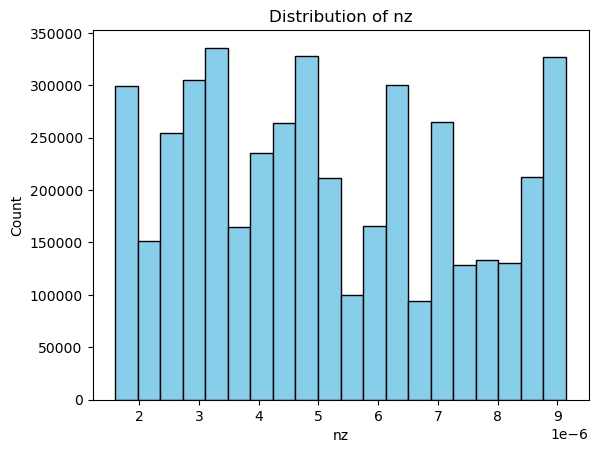

In [6]:
plt.hist(nz, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('nz')
plt.ylabel('Count')
plt.title('Distribution of nz')
plt.show()

## redshift

In [7]:
zmid = nz_ref[:,0]
zlow = nz_ref[:,1]
zhigh = nz_ref[:,2]
nz_ref_density = nz_ref[:,3] # (Mpc/h)^-3
Nbin = nz_ref[:,4]
Vol_bin = nz_ref[:,5]

zmid_in = nz_input[:,0]
nz_in = nz_input[:,1]

In [8]:
sky_area_deg2 = 4 * np.pi * (180/np.pi)**2
print(f"全天面积约为 {sky_area_deg2:.2f} 平方度")

from scipy.integrate import quad

# Cosmological parameters (example values for DESI(), modify as needed)
c = 299792.458  # speed of light in km/s
Om0 = 0.315192
Ode0 = 0.684808

def E(z):
    return np.sqrt(Om0 * (1 + z)**3 + Ode0)

def comoving_distance(z):
    integral, _ = quad(lambda x: 1.0 / E(x), 0, z)
    return (c / 100) * integral  # in cMpc/h

def angular_diameter_distance(z):
    return comoving_distance(z) / (1 + z)

# V_zbins = np.zeros(len(zmid))
# for i in range(len(zmid)):
#     V_zbins[i] = area/3 * (np.pi/180)**2 * ( comoving_distance(zhigh[i])**3 - comoving_distance(zlow[i])**3 ) # (Mpc/h)^3
# max(abs(V_zbins / Vol_bin -1))

全天面积约为 41252.96 平方度


In [9]:
# h=0.6736
# N_ref = np.zeros(len(zmid))
# for i in range(len(zmid)):
#     V_zbin = area/3 * (np.pi/180)**2 * ( comoving_distance(zhigh[i])**3 - comoving_distance(zlow[i])**3 ) # (Mpc/h)^3
#     N_ref[i] = nz_ref[i,3] * V_zbin # / (h**3)

In [10]:
zbins = zhigh[(zhigh>=2.8) & (zhigh<=3.5)]
zbins_cen = 0.5 * (zbins[1:] + zbins[:-1]) 

mask = (zmid>=2.8) & (zmid<=3.5)
zbins, zbins_cen-zmid[mask]

(array([2.8 , 2.82, 2.84, 2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.  ,
        3.02, 3.04, 3.06, 3.08, 3.1 , 3.12, 3.14, 3.16, 3.18, 3.2 , 3.22,
        3.24, 3.26, 3.28, 3.3 , 3.32, 3.34, 3.36, 3.38, 3.4 , 3.42, 3.44,
        3.46, 3.48, 3.5 ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]))

In [11]:
hist_z_cosmo, bin_edges = np.histogram(z_cosmo, bins=zbins)
hist_z_obs, bin_edges = np.histogram(z_obs, bins=zbins)
hist_z_cosmo_status2, bin_edges = np.histogram(z_cosmo[status == 2], bins=zbins)
hist_z_obs_status2, bin_edges = np.histogram(z_obs[status == 2], bins=zbins)

In [12]:
# Vz_bins = np.zeros(len(zbins_cen))
# for i in range(len(zbins_cen)):
#     Vz_bins[i] = area/3 * (np.pi/180)**2 * ( comoving_distance(zbins[i+1])**3 - comoving_distance(zbins[i])**3 ) # (Mpc/h)^3

In [13]:
nz_ref_density[mask] / (hist_z_obs_status2/Vol_bin[mask]) 
nz_ref_density[mask] / (hist_z_obs_status2/(Vol_bin[mask] * area_tiles/area)) 

array([0.98606804, 0.9677989 , 1.00060811, 1.01952764, 1.00437865,
       0.99446351, 0.98670528, 1.01906654, 1.01408224, 1.02018345,
       1.00098175, 0.96719075, 1.03655535, 1.00759394, 0.98568522,
       1.04512082, 0.98834247, 1.01754378, 1.01085557, 0.98769961,
       1.0019937 , 0.97565838, 0.9972999 , 1.01954576, 0.96256159,
       0.97857779, 1.03202363, 0.96427123, 1.01536048, 1.01350796,
       1.06540599, 0.97112009, 0.97944539, 1.00265172, 1.01118238])

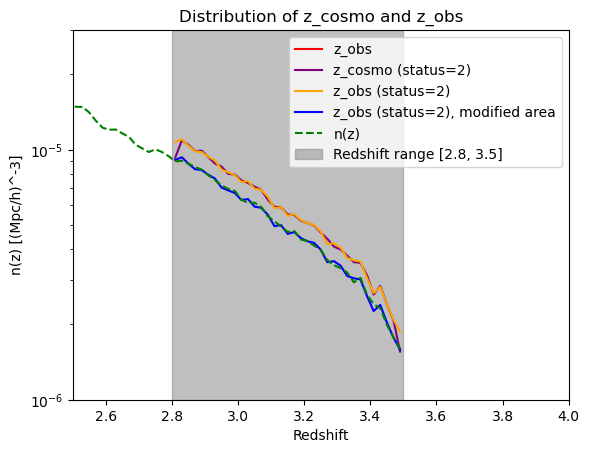

In [14]:
plt.plot(zmid[mask], hist_z_obs/Vol_bin[mask], label='z_obs', color='red')
plt.plot(zmid[mask], hist_z_cosmo_status2/Vol_bin[mask], label='z_cosmo (status=2)', color='purple')
plt.plot(zmid[mask], hist_z_obs_status2/Vol_bin[mask], label='z_obs (status=2)', color='orange')
plt.plot(zmid[mask], hist_z_obs_status2/(Vol_bin[mask] * area_tiles/area), label='z_obs (status=2), modified area', color='blue')
plt.plot(zmid, nz_ref_density, '--', label='n(z)', color='green')
# plt.plot(zmid_in, nz_in, '--', label='Reference n(z)', color='blue')
plt.axvspan(2.8, 3.5, color='gray', alpha=0.5, label='Redshift range [2.8, 3.5]')
plt.xlim(2.5, 4)
plt.ylim(1e-6, 3e-5)
plt.yscale('log')
plt.xlabel('Redshift')
plt.ylabel('n(z) [(Mpc/h)^-3]')
plt.title('Distribution of z_cosmo and z_obs')
plt.legend()
plt.show()

In [15]:
# plt.hist(z_cosmo, bins=50, histtype='step', label='z_cosmo', color='blue')
# plt.hist(z_obs, bins=50, histtype='step', label='z_obs', color='red')
# plt.hist(z_cosmo[status == 2], bins=50, histtype='step', label='z_cosmo (status=2)', color='purple')
# plt.hist(z_obs[status == 2], bins=50, histtype='step', label='z_obs (status=2)', color='orange')
# plt.plot(zmid, N_ref, drawstyle='steps-mid', label='N_ref', color='green')
# plt.xlim(2.5, 4)
# plt.yscale('log')
# plt.xlabel('Redshift')
# plt.ylabel('Count')
# plt.title('Distribution of z_cosmo and z_obs')
# plt.legend()
# plt.show()

- [x] Why z_obs (status=2) is not same as N_ref? --because addtional mask is performed, the area of tiles are 8752 deg^2, while the area in nz.txt file is 7417.4268 deg^2. After correcting the area, the n(z) match well. 

In next plot, we just directly plot the nz(z_obs, status=2) against the reference n(z) from nz.txt file.

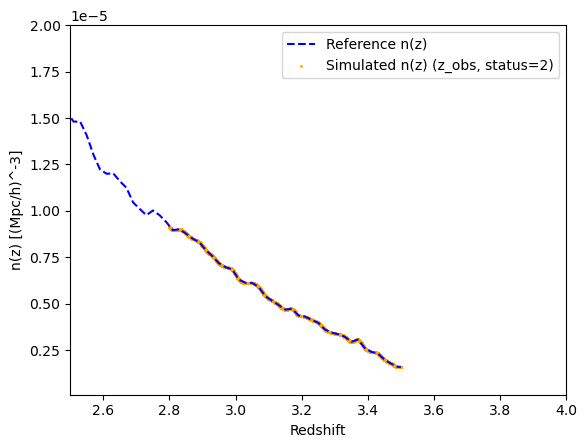

In [16]:
plt.plot(zmid_in, nz_in, '--', label='Reference n(z)', color='blue')
plt.scatter(z_obs[status==2], nz[status==2], s=1, color='orange', label='Simulated n(z) (z_obs, status=2)')
plt.xlabel('Redshift')
plt.ylabel('n(z) [(Mpc/h)^-3]')
plt.xlim(2.5, 4)
plt.ylim(1e-7, 2e-5)
plt.legend()

## RA, DEC

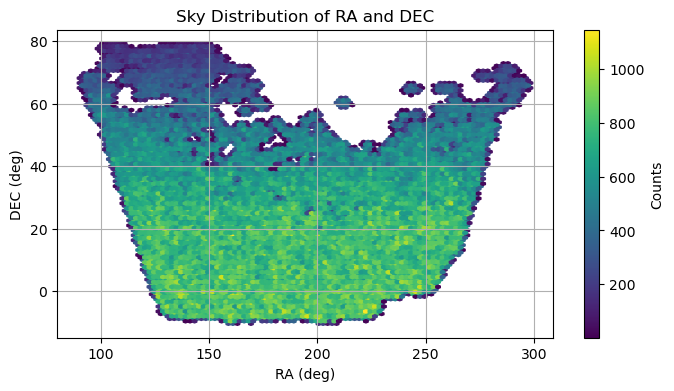

In [17]:
plt.figure(figsize=(8, 4))
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.hexbin(ra, dec, gridsize=100, cmap='viridis', mincnt=1)
cb = plt.colorbar(label='Counts')
plt.title('Sky Distribution of RA and DEC')
plt.grid(True)
plt.show()

In [18]:
# 计算每个z_cosmo的comoving distance
comov_dist = np.array([comoving_distance(z) for z in z_cosmo])

# 显示一些基本信息
print(f"共动距离范围: {comov_dist.min():.2f} - {comov_dist.max():.2f} Mpc/h")
print(f"对应红移范围: {z_cosmo.min():.3f} - {z_cosmo.max():.3f}")

# 查看 status == 2 的情况
z_obs_kept = z_obs[status == 2]
print(f"\nstatus == 2 的星系数量: {len(z_obs_kept)}")
print(f"status == 2 的 z_obs 范围: {z_obs_kept.min():.3f} - {z_obs_kept.max():.3f}")
print(f"总星系数量: {len(z_obs)}")
print(f"保留比例: {len(z_obs_kept)/len(z_obs)*100:.1f}%")

共动距离范围: 4221.22 - 4708.95 Mpc/h
对应红移范围: 2.762 - 3.543

status == 2 的星系数量: 119304
status == 2 的 z_obs 范围: 2.800 - 3.500
总星系数量: 4407346
保留比例: 2.7%
